# Boids

## Pre-commit checklist

- [ ] Restart kernel and run all cells
- [ ] Clear all output and save the notebook
- [ ] Run '!nbqa flake8 boids.ipynb'

In [1]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from matplotlib import pyplot as plt

!nbqa flake8 boids.ipynb
print("hello world")

boids.ipynb:cell_8:1:1: E265 block comment should start with '# '
boids.ipynb:cell_8:2:1: E265 block comment should start with '# '
boids.ipynb:cell_11:2:43: E231 missing whitespace after ','
hello world


In [2]:
def generate_boid_attributes(lower, upper, n=10):
    width = upper - lower
    attributes = np.random.random_sample(size=(2, n)) * width[:, np.newaxis]
    attributes += lower[:, np.newaxis]
    return attributes


expected = (2, 10)
actual = generate_boid_attributes(np.array([0, 0]), np.array([1, 1])).shape
assert expected == actual

In [3]:
lower_p = np.array([150, 300])  # x-lower, y-lower
upper_p = np.array([200, 400])  # x-upper, y-upp

positions = generate_boid_attributes(lower_p, upper_p)
positions

array([[187.84067867, 190.07129084, 183.50370594, 177.5204471 ,
        182.57898126, 156.47747357, 197.59697714, 186.14122929,
        171.05491167, 195.22095504],
       [396.31431603, 369.89145489, 322.99985445, 345.7729882 ,
        359.84989854, 350.65624356, 353.25280586, 356.95486721,
        315.20751125, 344.83617752]])

In [4]:
lower_v = np.array([5, -10])  # x-lower, y-lower
upper_v = np.array([15, 5])  # x-upper, y-upp

velocities = generate_boid_attributes(lower_v, upper_v)
velocities

array([[ 7.14272373, 14.41891477, 11.96181204, 11.95540542, 13.08244362,
        14.67204979, 10.00810287,  9.6147394 , 13.25003919, 13.57087514],
       [-8.00446564, -3.54368102,  0.87391177, -4.44782995, -4.16086015,
        -6.98639219, -6.49447519,  3.29576803,  2.0824102 ,  4.43788434]])

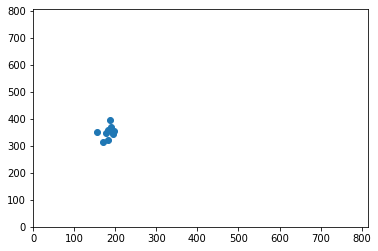

In [5]:
plt.xlim(0, 4 * upper_p[0] + upper_v[0])
plt.ylim(0, 2 * upper_p[1] + upper_v[1])

scatter = plt.scatter(positions[0, :], positions[1:])

In [6]:
def update_boids(positions, velocities):
    """Updates the boid positions."""
    positions += velocities


def animate(frame):
    """Updates the scatter plot."""
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [7]:
anim = animation.FuncAnimation(scatter.figure, animate, frames=50, interval=50)

HTML(anim.to_jshtml())

In [8]:
#create a fresh flock as the old one will have been
#modified by the simulation
positions = generate_boid_attributes(lower_p, upper_p)
positions

velocities = generate_boid_attributes(lower_v, upper_v)
velocities

array([[11.69828615,  9.89359143, 14.6797344 , 12.16269039,  5.22366568,
         8.63116316, 12.87307882,  9.72198689,  7.61408475, 12.57971592],
       [-8.63163155,  0.92410153,  0.91130804, -9.99486851, -3.71836889,
         2.14696674,  3.65426689, -5.11965965,  4.69393436, -1.27336472]])

In [9]:
!nbqa flake8 boids.ipynb

boids.ipynb:cell_8:1:1: E265 block comment should start with '# '
boids.ipynb:cell_8:2:1: E265 block comment should start with '# '
boids.ipynb:cell_11:2:43: E231 missing whitespace after ','


In [10]:
positions.shape

middle = np.mean(positions, axis=1)
assert middle.shape == (2,), middle.shape

In [11]:
# This would be better called "direction from middle"
direction_to_middle = positions - middle[:,np.newaxis]
direction_to_middle

array([[ 21.19961829, -17.50328541,  -9.03605375,   8.81612688,
        -17.08639736, -14.73596895,   3.55617931,  18.62652427,
          0.12595061,   6.03730612],
       [ -7.80914523,  -6.05978503, -43.62847292,  27.80218156,
         32.93159707,  33.9666507 ,  29.32695644,  16.73111021,
        -38.594817  , -44.66627581]])

In [12]:
def update_boids(positions, velocities):
    """updated the boid positions. 
    
    Boids tend towards the midde of the flock"""
    move_to_middle_strength = 0.1
    
    # recalculate the value of middle
    middle = np.mean(positions, axis=1)
    
    # recalculate the value of direction_to_middle
    direction_to_middle = positions - middle[:,np.newaxis]

    
    # adjust the velocities
    velocities -= direction_to_middle * move_to_middle_strength
    
    # adjust the positions
    positions += velocities               
    
test_pos = np.array([[1.0,2.0,3.0],[1.0,2.0,3.0]])
test_vel = np.array([[1.0,1.0,1.0],[1.0,1.0,1.0]])

update_boids(test_pos, test_vel)

expected = np.array([[2.1, 3. , 3.9],
       [2.1, 3. , 3.9]])
actual = test_pos

np.testing.assert_array_equal(expected, actual)


In [13]:
anim = animation.FuncAnimation(scatter.figure, animate, frames=50, interval=50)

HTML(anim.to_jshtml())